In [18]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
import random
from datetime import datetime
import numpy as np
import os

In [19]:
DATASET_URL = "./air_quality.csv"
FEATURES = [
	"date",
	"time",
	"pt08.s1",
	"nmhc",
	"c6h6",
	"pt08.s2",
	"nox",
	"pt08.s3",
	"no2",
	"pt08.s4",
	"pt08.s5",
	"t",
	"rh",
	"ah"
]
LABEL = "co"
COLUMNS = [
	"date",
	"time",
	"co",
	"pt08.s1",
	"nmhc",
	"c6h6",
	"pt08.s2",
	"nox",
	"pt08.s3",
	"no2",
	"pt08.s4",
	"pt08.s5",
	"t",
	"rh",
	"ah"
]
DTYPE={
	"date": "object",
	"time": "object",
	"co": "float32",
	"pt08.s1": "float32",
	"nmhc": "float32",
	"c6h6": "float32",
	"pt08.s2": "float32",
	"nox": "float32",
	"pt08.s3": "float32",
	"no2": "float32",
	"pt08.s4": "float32",
	"pt08.s5": "float32",
	"t": "float32",
	"rh": "float32",
	"ah": "float32"
}
TEST_SET_SIZE=0.2
SHUFFLE_SIZE=1024
BATCH_SIZE=50
SEED=1
COLUMNS

['date',
 'time',
 'co',
 'pt08.s1',
 'nmhc',
 'c6h6',
 'pt08.s2',
 'nox',
 'pt08.s3',
 'no2',
 'pt08.s4',
 'pt08.s5',
 't',
 'rh',
 'ah']

In [20]:
tf.random.set_seed(SEED)
random.seed(SEED)

In [21]:
data = pd.read_csv(os.path.join(os.path.abspath(os.getcwd()), DATASET_URL), names=COLUMNS, dtype=DTYPE, index_col=False, skipinitialspace=True, skiprows=1, delimiter=";")
data.head()

,date,time,co,pt08.s1,nmhc,c6h6,pt08.s2,nox,pt08.s3,no2,pt08.s4,pt08.s5,t,rh,ah
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.900002,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.700001,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.000000,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.000000,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.599998,0.7888


In [22]:
# Drop columns
DROP_COLUMNS = ["date", "time"]

for column in DROP_COLUMNS:
	data = data.drop(column, axis=1)
	FEATURES.remove(column)
	COLUMNS.remove(column)
	DTYPE.pop(column)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9391 entries, 0 to 9390
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   co       9357 non-null   float32
 1   pt08.s1  9357 non-null   float32
 2   nmhc     9357 non-null   float32
 3   c6h6     9357 non-null   float32
 4   pt08.s2  9357 non-null   float32
 5   nox      9357 non-null   float32
 6   pt08.s3  9357 non-null   float32
 7   no2      9357 non-null   float32
 8   pt08.s4  9357 non-null   float32
 9   pt08.s5  9357 non-null   float32
 10  t        9357 non-null   float32
 11  rh       9357 non-null   float32
 12  ah       9357 non-null   float32
dtypes: float32(13)
memory usage: 477.0 KB


In [24]:
# Replace -200 with nan
data = data.replace('-200', np.nan)

# Missing values
data = data.dropna()
data.isna().sum()

co         0
pt08.s1    0
nmhc       0
c6h6       0
pt08.s2    0
nox        0
pt08.s3    0
no2        0
pt08.s4    0
pt08.s5    0
t          0
rh         0
ah         0
dtype: int64

In [25]:
# Normalise Features
for feature in FEATURES:
    if data[feature].dtype == "float32":
        # min_max_scaler = preprocessing.MinMaxScaler()
        # data[[feature]] = min_max_scaler.fit_transform(data[[feature]])
        standard_scaler = preprocessing.StandardScaler()
        data[[feature]] = standard_scaler.fit_transform(data[[feature]])

data.describe()

,co,pt08.s1,nmhc,c6h6,pt08.s2,nox,pt08.s3,no2,pt08.s4,pt08.s5,t,rh,ah
count,9357.000000,9.357000e+03,9.357000e+03,9357.000000,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03
mean,-34.207523,-1.304588e-08,-4.566058e-08,0.000000,-6.522941e-09,-3.261470e-08,4.892206e-09,1.304588e-08,-6.522941e-09,2.079187e-08,-2.853787e-09,6.522941e-09,-1.630735e-09
std,77.657173,1.000053e+00,1.000053e+00,1.000053,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00
min,-200.000000,-3.786941e+00,-2.926702e-01,-4.878576,-3.197626e+00,-1.431967e+00,-3.090259e+00,-2.033730e+00,-3.406529e+00,-2.571759e+00,-4.855832e+00,-4.676224e+00,-4.956111e+00
25%,0.600000,-3.880661e-01,-2.926702e-01,0.051581,-5.363343e-01,-4.607914e-01,-4.906888e-01,-4.056349e-02,-4.419653e-01,-6.020218e-01,2.596436e-02,-1.051557e-01,1.932003e-01
50%,1.500000,1.215814e-02,-2.926702e-01,0.145834,1.182314e-03,-1.072837e-01,-3.075281e-03,2.981961e-01,1.166997e-01,-7.238135e-02,1.717933e-01,1.779733e-01,2.005000e-01
75%,2.600000,5.215344e-01,-2.926702e-01,0.283588,6.146525e-01,4.482285e-01,5.124905e-01,5.896869e-01,5.790431e-01,6.126495e-01,3.315106e-01,4.376709e-01,2.086951e-01
max,11.900000,3.004744e+00,9.644258e+00,1.494377,3.854359e+00,5.090446e+00,5.863815e+00,2.220460e+00,2.961396e+00,3.387790e+00,8.060332e-01,9.609714e-01,2.326799e-01


In [26]:
# Normalise Label
min_max_scaler = preprocessing.MinMaxScaler()
data[[LABEL]] = min_max_scaler.fit_transform(data[[LABEL]])
# standard_scaler = preprocessing.StandardScaler()
# data[[feature]] = standard_scaler.fit_transform(data[[feature]])

data.describe()

,co,pt08.s1,nmhc,c6h6,pt08.s2,nox,pt08.s3,no2,pt08.s4,pt08.s5,t,rh,ah
count,9357.000000,9.357000e+03,9.357000e+03,9357.000000,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03
mean,0.782409,-1.304588e-08,-4.566058e-08,0.000000,-6.522941e-09,-3.261470e-08,4.892206e-09,1.304588e-08,-6.522941e-09,2.079187e-08,-2.853787e-09,6.522941e-09,-1.630735e-09
std,0.366480,1.000053e+00,1.000053e+00,1.000053,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00
min,0.000000,-3.786941e+00,-2.926702e-01,-4.878576,-3.197626e+00,-1.431967e+00,-3.090259e+00,-2.033730e+00,-3.406529e+00,-2.571759e+00,-4.855832e+00,-4.676224e+00,-4.956111e+00
25%,0.946673,-3.880661e-01,-2.926702e-01,0.051581,-5.363343e-01,-4.607914e-01,-4.906888e-01,-4.056349e-02,-4.419653e-01,-6.020218e-01,2.596436e-02,-1.051557e-01,1.932003e-01
50%,0.950920,1.215814e-02,-2.926702e-01,0.145834,1.182314e-03,-1.072837e-01,-3.075281e-03,2.981961e-01,1.166997e-01,-7.238135e-02,1.717933e-01,1.779733e-01,2.005000e-01
75%,0.956111,5.215344e-01,-2.926702e-01,0.283588,6.146525e-01,4.482285e-01,5.124905e-01,5.896869e-01,5.790431e-01,6.126495e-01,3.315106e-01,4.376709e-01,2.086951e-01
max,1.000000,3.004744e+00,9.644258e+00,1.494377,3.854359e+00,5.090446e+00,5.863815e+00,2.220460e+00,2.961396e+00,3.387790e+00,8.060332e-01,9.609714e-01,2.326799e-01


In [9]:
# # Set categories
# for column in COLUMNS:
# 	if data[column].dtype.name == "category":
# 		labelencoder = preprocessing.LabelEncoder()
# 		data[column] = labelencoder.fit_transform(data[column])
# 		categories=data[column].unique()
# 		data[column] = data[column].astype(pd.CategoricalDtype(categories=categories))
# 		print(data[column].cat.categories.tolist())

[6, 7, 5, 4, 3, 1, 8, 0, 2]
[3, 2, 4, 1, 0, 6, 5]
[7, 10, 1, 11, 0, 6, 5, 3, 4, 2, 8, 9]
[0, 5, 2, 3, 1, 6, 4]


In [27]:
data = data.astype(dtype=DTYPE)
data.dtypes

co         float32
pt08.s1    float32
nmhc       float32
c6h6       float32
pt08.s2    float32
nox        float32
pt08.s3    float32
no2        float32
pt08.s4    float32
pt08.s5    float32
t          float32
rh         float32
ah         float32
dtype: object

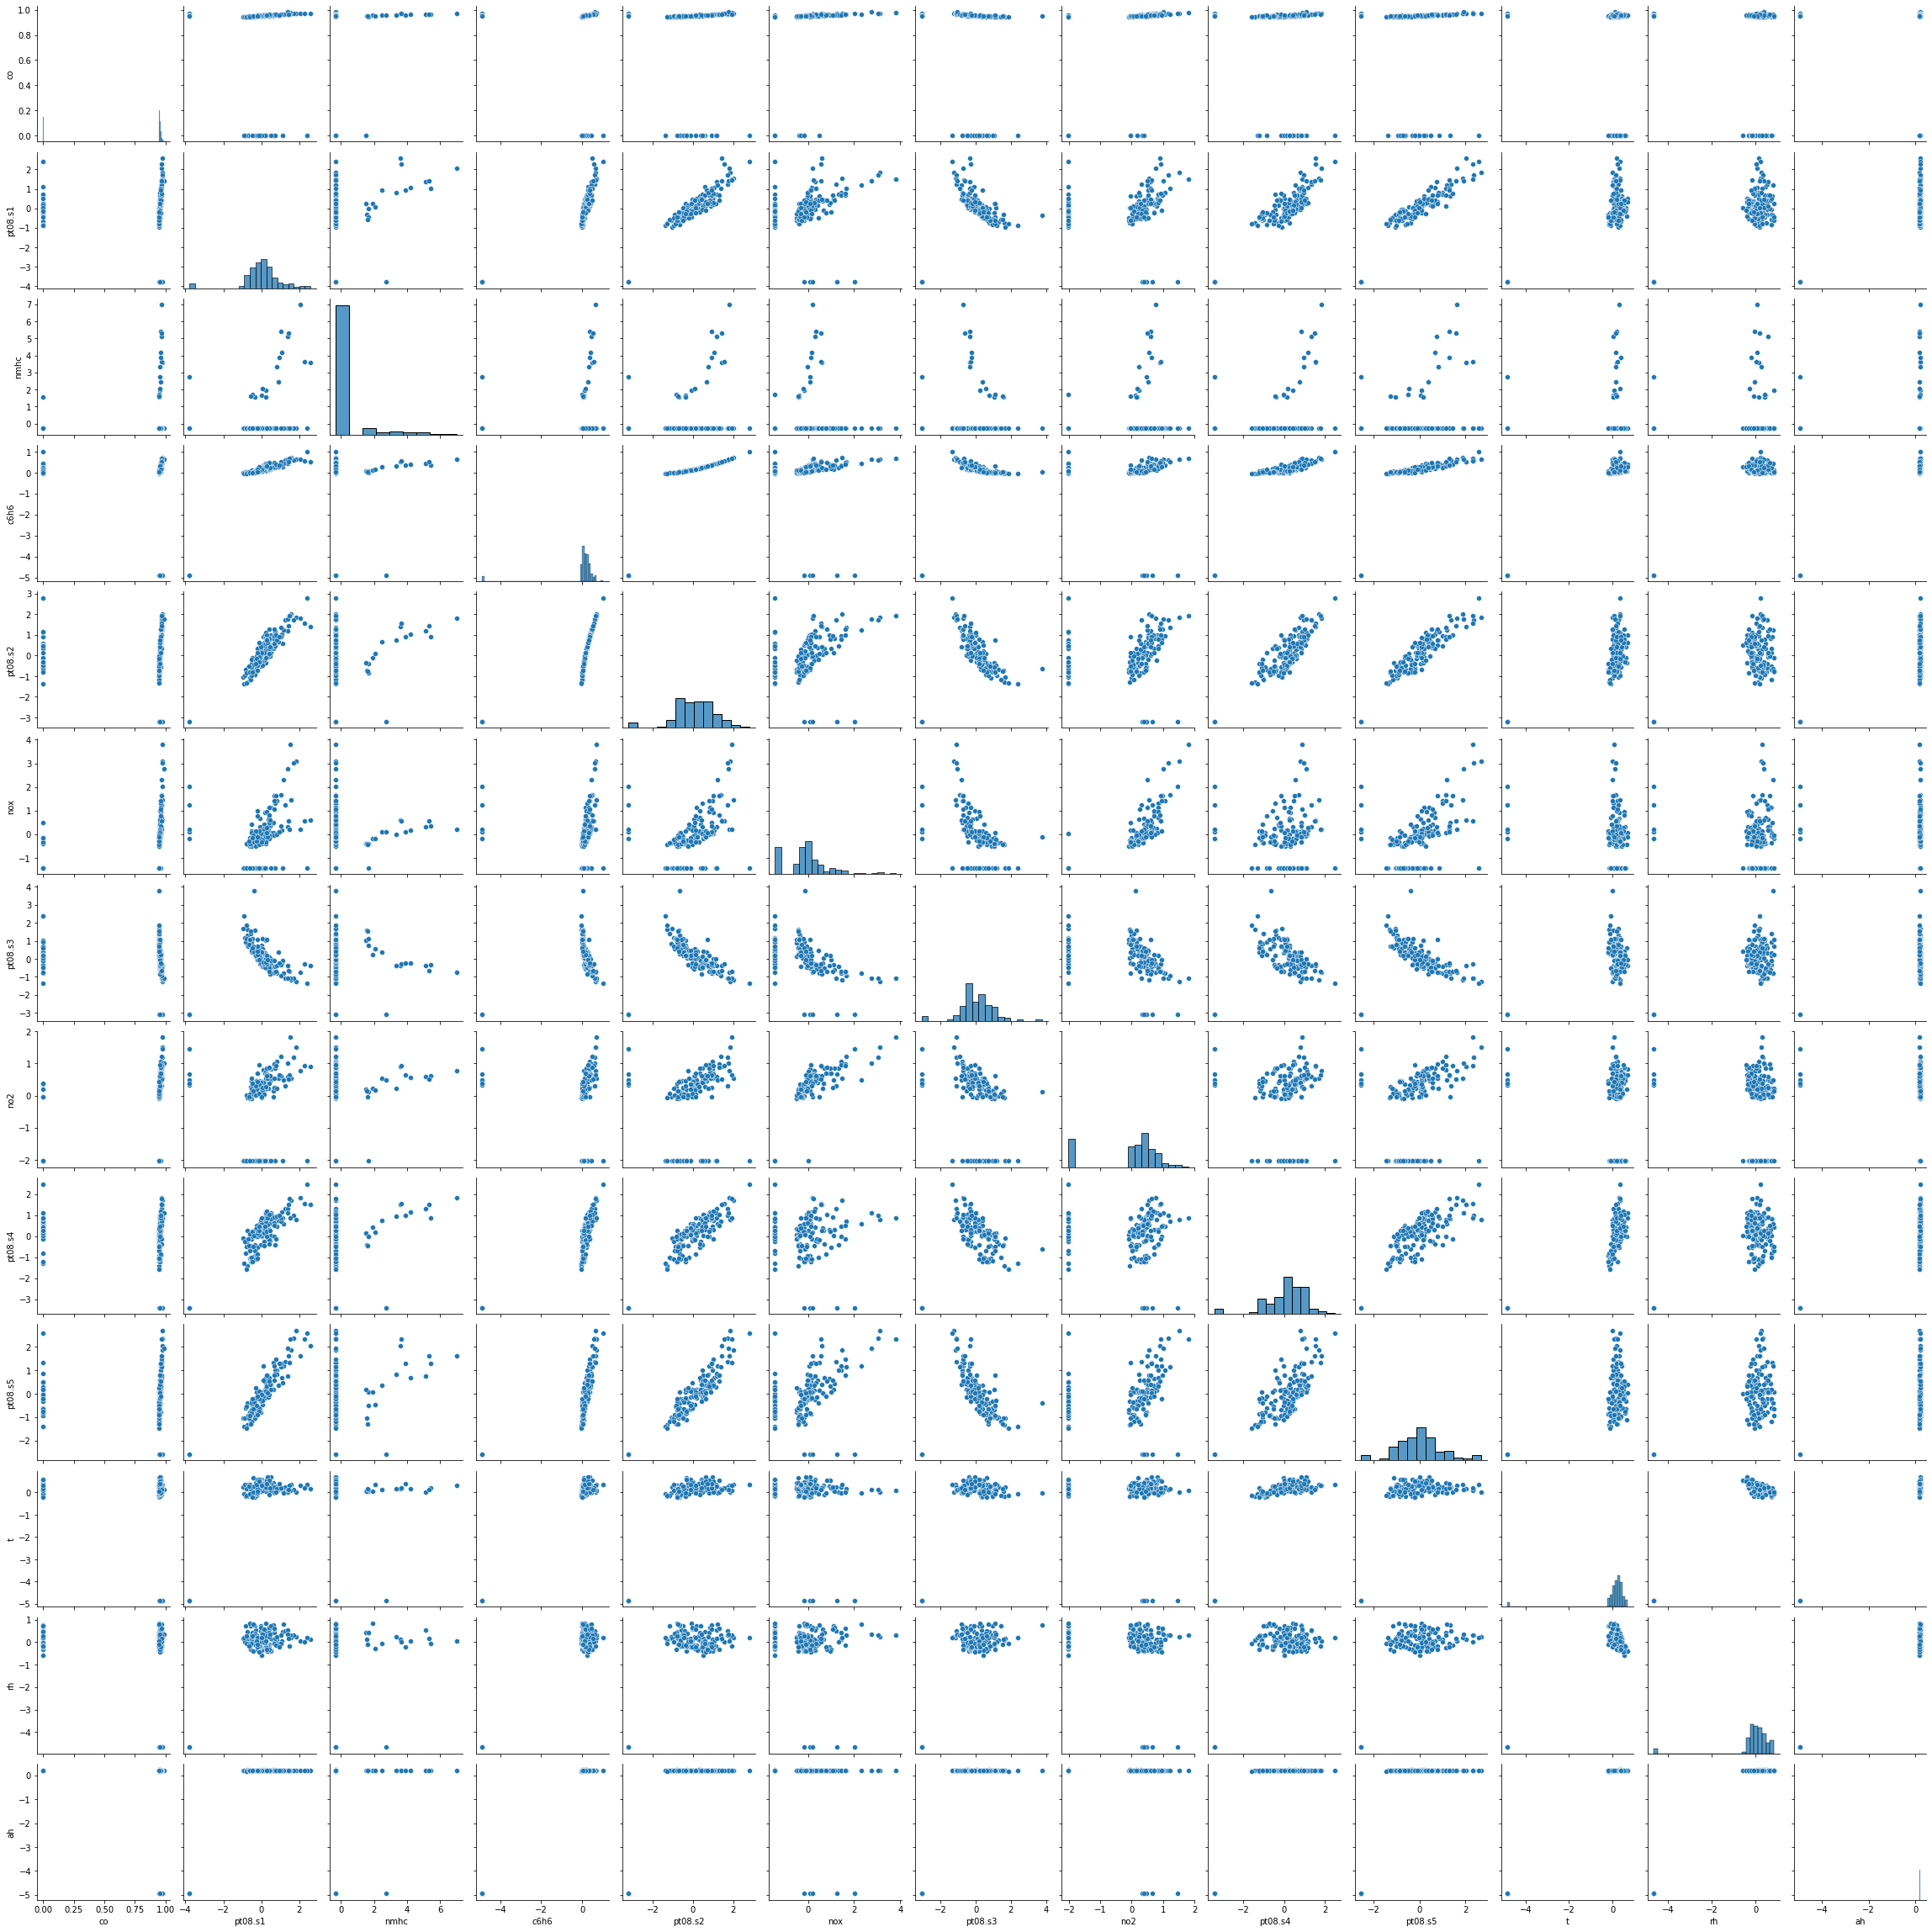

In [28]:
sns.pairplot(data.sample(n=150, random_state=1))

In [29]:
target = data.pop(LABEL)
target

0       0.956111
1       0.953280
2       0.954224
3       0.954224
4       0.951392
          ...   
9352    0.958471
9353    0.955168
9354    0.955168
9355    0.953752
9356    0.954224
Name: co, Length: 9357, dtype: float32

In [30]:
data = pd.get_dummies(data, dtype="float32")
data

,pt08.s1,nmhc,c6h6,pt08.s2,nox,pt08.s3,no2,pt08.s4,pt08.s5,t,rh,ah
0,0.942983,2.211236,0.242504,0.442297,-0.010166,0.810649,0.432124,0.643257,0.641101,0.088462,0.183831,0.194881
1,0.736807,1.939383,0.182085,0.176459,-0.254902,1.177136,0.266684,0.358574,-0.006723,0.081518,0.160400,0.194052
2,1.070327,1.767686,0.172418,0.129719,-0.146131,1.071538,0.440002,0.350012,0.216513,0.049112,0.283414,0.194686
3,0.991495,1.710454,0.177252,0.156010,0.013142,0.922459,0.503027,0.412086,0.498842,0.028279,0.400571,0.195622
4,0.676167,1.502988,0.112000,-0.171174,-0.146131,1.273416,0.455759,0.210881,0.295303,0.032909,0.392761,0.195676
...,...,...,...,...,...,...,...,...,...,...,...,...
9352,0.803511,-0.292670,0.281172,0.602967,1.178552,-0.795059,1.038740,-0.037415,1.650044,0.280586,-0.198881,0.194855
9353,0.345678,-0.292670,0.230420,0.386792,0.716273,-0.593181,0.952081,-0.272867,0.643290,0.336140,-0.308227,0.193703
9354,0.282006,-0.292670,0.254587,0.491958,0.483191,-0.596287,0.920568,-0.322099,0.255908,0.396323,-0.413669,0.191874
9355,-0.139442,-0.292670,0.184502,0.193987,0.257878,-0.288811,0.770884,-0.750194,-0.448820,0.428730,-0.507394,0.188623


In [31]:
train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=TEST_SET_SIZE)

# Set training dataset
train = tf.data.Dataset.from_tensor_slices(
		(train_x.values, train_y.values))
train = train.shuffle(
		SHUFFLE_SIZE,
		seed=SEED
)
train = train.batch(BATCH_SIZE)

# Set testing dataset
test = tf.data.Dataset.from_tensor_slices(
		(test_x.values, test_y.values))
test = test.shuffle(
		SHUFFLE_SIZE,
		seed=SEED
)
test = test.batch(BATCH_SIZE)